# ALeRCE classes

https://github.com/ZwickyTransientFacility/ztf-avro-alert

1. **AGN:** Active Galactic Nuclei
1. **Blazar:** Blazar
1. **CV/Nova:** Cataclysmic Variable Star/Nova
1. **Ceph:** Cepheid Variable Star
1. **DSCT:** Delta Scuti Star
1. **EA:** Eclipsing Algol
1. **EB/EW:** Eclipsing Binaries/Eclipsing W Ursa Majoris
1. **LPV:** Long Period Variable
1. **Periodic-Other:** Periodic-Other
1. **QSO:** Quasi-Stellar Object
1. **RRL:** RRLyrae Variable Star
1. **RSCVn:** RS Canum Venaticorum
1. **SLSN:** Super Luminous Supernova
1. **SNII:** Supernova II
1. **SNIIb:** Supernova IIb
1. **SNIIn:** Supernova IIn
1. **SNIa:** Supernova Ia
1. **SNIbc:** Supernova Ibc
1. **TDE:** Tidal disruption event (to remove)
1. **YSO:** Young Stellar Object
1. **ZZ:** ZZ Ceti Stars (to remove)

In [1]:
import numpy as np
import pandas as pd

def subset_df_columns(df, subset_cols):
    df_cols = list(df.columns)
    return df[[c for c in subset_cols if c in df_cols]]

def set_index(df, index_name):
    if not df.index.name is None and df.index.name==index_name:
        return df
    df_cols = list(df.columns)
    assert index_name in df_cols
    return df.set_index([index_name])

def df_to_float32(df):
    for c in df.columns:
        if df[c].dtype=='float64':
            df[c] = df[c].astype(np.float32)

In [2]:
import numpy as np
import pandas as pd

load_root_dir = '../../../../surveys_data'
survey_name = 'alerceZTFv5.1'
df_index_names = {
    'oid':'oid', # object id
    'oid_det':'oid', # object id
    'label':'classALeRCE', # object class name
    'ra':'ra',
    'dec':'dec',
    'band':'fid', # band
    'obs_day':'mjd', # days
    'obs':'magpsf_corr', # observations
    'obs_error':'sigmapsf_corr', # observation errors
}
subset_columns_names = {
    'labels':['oid', 'classALeRCE', 'ra', 'dec'],
    'detections':['oid', 'fid', 'mjd', 'magpsf_corr', 'sigmapsf_corr'],
}

### load files and processing
labels_df = pd.read_csv(f'{load_root_dir}/{survey_name}/dfcrossmatches_prioritized_v5.1.csv')
print(f'labels - columns: {list(labels_df.columns)} - id: {labels_df.index.name}')
labels_df = subset_df_columns(labels_df, subset_columns_names['labels']) # sub sample columns
labels_df = set_index(labels_df, df_index_names['oid']) # set index

detections_df = pd.read_csv(f'{load_root_dir}/{survey_name}/detections.csv')
print(f'detections_df - columns: {list(detections_df.columns)} - id: {detections_df.index.name}')
detections_df = subset_df_columns(detections_df, subset_columns_names['detections']) # sub sample columns
detections_df = set_index(detections_df, df_index_names['oid_det']) # set index
detections_df.index.rename(df_index_names['oid'], inplace=True)
df_to_float32(detections_df)

### print info
classes = np.unique(labels_df[df_index_names['label']].values)
print('classes:', classes)

labels - columns: ['oid', 'classALeRCE', 'ra', 'dec', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec'] - id: None


/home/opimentel/anaconda3/envs/lchandler/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


detections_df - columns: ['oid', 'candid', 'mjd', 'fid', 'diffmaglim', 'magpsf', 'magap', 'sigmapsf', 'sigmagap', 'ra', 'dec', 'sigmara', 'sigmadec', 'isdiffpos', 'distpsnr1', 'sgscore1', 'field', 'rcid', 'magnr', 'sigmagnr', 'rb', 'magpsf_corr', 'magap_corr', 'sigmapsf_corr', 'sigmagap_corr', 'has_stamps', 'parent_candid'] - id: None
classes: ['AGN' 'Blazar' 'CV/Nova' 'Ceph' 'DSCT' 'EA' 'EB/EW' 'LPV'
 'Periodic-Other' 'QSO' 'RRL' 'RSCVn' 'SLSN' 'SNII' 'SNIIb' 'SNIIn' 'SNIa'
 'SNIbc' 'TDE' 'YSO' 'ZZ']


In [3]:
labels_df.info()
labels_df[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 170976 entries, ZTF19aavdfaf to ZTF18aaarlcy
Data columns (total 3 columns):
classALeRCE    170976 non-null object
ra             170976 non-null float64
dec            170976 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.2+ MB


,classALeRCE,ra,dec
oid,,,
ZTF19aavdfaf,CV/Nova,323.746659,40.671826
ZTF19aaniokz,CV/Nova,306.822433,43.689485
ZTF18accatjz,CV/Nova,331.153495,53.506598
ZTF19aarfrrf,CV/Nova,271.876088,45.858938
ZTF19aarfrre,CV/Nova,271.876073,45.859003
ZTF19aapbkgn,CV/Nova,286.886476,52.974638
ZTF18abcoxgp,CV/Nova,329.384641,8.920860
ZTF18aclmvom,CV/Nova,45.945404,64.909859
ZTF18aaavxnm,CV/Nova,225.670540,33.573209


In [4]:
detections_df.info()
detections_df[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 33950426 entries, ZTF18abnusmf to ZTF18abnusmf
Data columns (total 4 columns):
fid              int64
mjd              float32
magpsf_corr      object
sigmapsf_corr    object
dtypes: float32(1), int64(1), object(2)
memory usage: 1.1+ GB


,fid,mjd,magpsf_corr,sigmapsf_corr
oid,,,,
ZTF18abnusmf,1,58493.175781,16.4254,0.0358943
ZTF18abnusmf,1,58490.113281,16.4629,0.0285616
ZTF18abnusmf,1,58426.316406,16.4224,0.0347103
ZTF18abcoetg,1,58645.402344,15.6524,0.0237883
ZTF18abcoetg,1,58643.421875,15.6256,0.0202918
ZTF18abcoetg,2,58642.476562,14.8381,0.0279326
ZTF18abcoetg,1,58642.382812,15.4221,0.0183757
ZTF18abcoetg,2,58638.292969,14.8684,0.0256671
ZTF18abcoetg,2,58634.347656,14.8549,0.0266552


In [5]:
import sys
sys.path.append('../../../')
sys.path.append('../../../../flaming-choripan')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
label_to_class_dict: {'AGN': 'AGN', 'Blazar': 'Blazar', 'CV/Nova': 'CV/Nova', 'Ceph': 'Ceph', 'DSCT': 'DSCT', 'EA': 'EA', 'EB/EW': 'EB/EW', 'LPV': 'LPV', 'Periodic-Other': 'Periodic-Other', 'QSO': 'QSO', 'RRL': 'RRL', 'RSCVn': 'RSCVn', 'SLSN': 'SLSN', 'SNII': 'SNII', 'SNIIb': 'SNIIb', 'SNIIn': 'SNIIn', 'SNIa': 'SNIa', 'SNIbc': 'SNIbc', 'TDE': 'TDE', 'YSO': 'YSO', 'ZZ': 'ZZ'}
label_to_class_dict: 
	AGN: AGN
	Blazar: Blazar
	CV/Nova: CV/Nova
	Ceph: Ceph
	DSCT: DSCT
	EA: EA
	EB/EW: EB/EW
	LPV: LPV
	Periodic-Other: Periodic-Other
	QSO: QSO
	RRL: RRL
	RSCVn: RSCVn
	SLSN: SLSN
	SNII: SNII
	SNIIb: SNIIb
	SNIIn: SNIIn
	SNIa: SNIa
	SNIbc: SNIbc
	TDE: TDE
	YSO: YSO
	ZZ: ZZ
class_to_label_dict: 
	AGN: AGN
	Blazar: Blazar
	CV/Nova: CV/Nova
	Ceph: Ceph
	DSCT: DSCT
	EA: EA
	EB/EW: EB/EW
	LPV: LPV
	Periodic-Other: Periodic-Other
	QSO: QSO
	RRL: RRL
	RSCVn: RSCVn
	SLSN: SLSN
	SNII: SNII
	SNIIb: SNIIb
	SNIIn: SNIIn


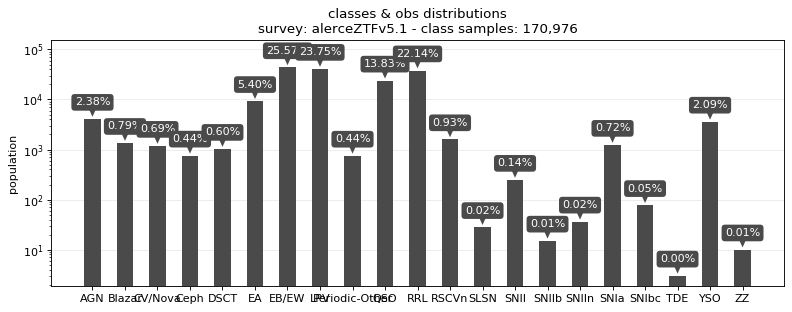

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from lchandler.survey_export.utils import LightCurveDictionaryCreator

band_dictionary = {
    'g':1,
    'r':2,
}
args = [survey_name, detections_df, labels_df, band_dictionary, df_index_names]
kwargs = {
    'obs_is_flux':False,
    'remove_negative_fluxes':True,
    'zero_point':48.6,
    #'maximum_samples_per_class':5000,
}
lcDictionaryCreator = LightCurveDictionaryCreator(*args, **kwargs)
lcDictionaryCreator.plot_class_distribution(figsize=(10,4), uses_log_scale=True)

In [ ]:
DF_INVALID_CLASSES = ['ZZ','TDE']
DF_SN_LIST = ['SLSN' ,'SNII', 'SNIIb', 'SNIIn', 'SNIa', 'SNIbc']

#mode = 'raw'
#mode = 'simple'
#mode = 'transients'
#mode = 'RRCeph'
#mode = 'onlySNe'
mode = 'onlySNIa'

if mode=='simple':
    invalid_classes = DF_INVALID_CLASSES
    query_classes = []
    to_merge_classes_dic = {'SN':DF_SN_LIST,}
    
elif mode=='onlySNe':
    invalid_classes = DF_INVALID_CLASSES
    query_classes = DF_SN_LIST
    to_merge_classes_dic = {'merSNII':['SNII', 'SNIIb', 'SNIIn'],}
    
elif mode=='onlySNIa':
    invalid_classes = DF_INVALID_CLASSES
    query_classes = DF_SN_LIST
    to_merge_classes_dic = {'nonSNIa':['SLSN' ,'SNII', 'SNIIb', 'SNIIn', 'SNIbc'],}

elif mode=='RRCeph':
    invalid_classes = DF_INVALID_CLASSES
    query_classes = ['RRL','Ceph']
    to_merge_classes_dic = {}

lcDictionaryCreator.update_labels_df(invalid_classes, query_classes, to_merge_classes_dic)
lcDictionaryCreator.plot_class_distribution(figsize=(5,4), uses_log_scale=True)

In [ ]:
%load_ext autoreload
%autoreload 2
from src import C_

description = 'ZTF Alerce'
save_folder = f'../save/{survey_name}'
filename_extra_parameters = {
    'mode':mode,
}
kwargs = {
    'to_export_bands':list(band_dictionary.keys()),
    #'to_export_bands':['g','r'],
    #'SCPD_probs':C_.DEFAULT_SCPD_PS,
    'filename_extra_parameters':filename_extra_parameters,
    'saves_every':1e5,
}
raw_lcdataset = lcDictionaryCreator.export_dictionary(description, save_folder, **kwargs)

In [ ]:
import flamingchoripan.myUtils.lists as lists
import matplotlib.pyplot as plt
from src.plots import plot_lightcurve

lcset = raw_lcdataset.raw
lcobj, key = lcset.get_random_lcobj()
fig, ax = plt.subplots(1,1, figsize=(12,5))
for kb,b in enumerate(lcset.band_names):
    plot_lightcurve(ax, lcobj, b)
ax.set_title(f'survey: {lcset.survey} - key: {key} - class: {lcset.class_names[lcobj.y]}')
ax.set_xlabel('days')
ax.set_ylabel('flux')
ax.grid(alpha=0.5)